In [1]:
import os
import pandas as pd
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img, array_to_img, save_img

def augment_images(dataset_path, output_path, output_csv, augment_count=1000, target_size=(64, 64)):
    # Create an ImageDataGenerator object with augmentation parameters
    datagen = ImageDataGenerator(
        rotation_range=19,
        # width_shift_range=0.2,
        # height_shift_range=0.2,
        shear_range=0.1,
        zoom_range=0.1,
        # horizontal_flip=True,
        fill_mode='nearest'
    )
    
    labels = []

    for class_dir in os.listdir(dataset_path):
        class_path = os.path.join(dataset_path, class_dir)
        if not os.path.isdir(class_path):
            continue
        
        for img_file in os.listdir(class_path):
            img_path = os.path.join(class_path, img_file)
            if not img_file.endswith(('.jpg', '.jpeg', '.png')):
                continue
            
            # Load image with the target size
            img = load_img(img_path, target_size=target_size)
            x = img_to_array(img)
            x = x.reshape((1,) + x.shape)
            
            i = 0
            for batch in datagen.flow(x, batch_size=1):
                augmented_img = array_to_img(batch[0])
                augmented_img_name = f"{os.path.splitext(img_file)[0]}_aug_{i}.png"
                augmented_img_path = os.path.join(output_path, class_dir)
                if not os.path.exists(augmented_img_path):
                    os.makedirs(augmented_img_path)
                
                save_img(os.path.join(augmented_img_path, augmented_img_name), augmented_img)
                labels.append([os.path.join(augmented_img_path, augmented_img_name), class_dir])
                i += 1
                if i >= augment_count:
                    break
            break
    
    # Save labels to CSV
    df = pd.DataFrame(labels, columns=['file_path', 'label'])
    df.to_csv(output_csv, index=False)
    print(f"Augmented images and labels CSV file created at: {output_csv}")

# Usage
dataset_path = "../data/data_original/javaneseScript_byPhiard/CustomAksara"
output_path = "../data/data_preprocessing/v1.0/"
output_csv = "../data/data_preprocessing/v1.0/augmented_labels.csv"
augment_images(dataset_path, output_path, output_csv)

Augmented images and labels CSV file created at: ../data/data_preprocessing/v1.0/augmented_labels.csv


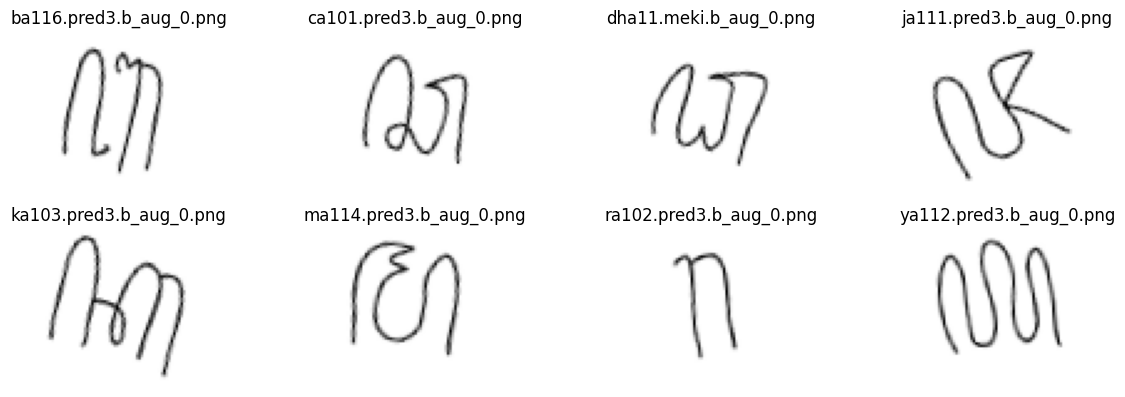

In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# Memuat CSV yang berisi daftar gambar augmented dan labelnya
output_csv = "../data/data_preprocessing/v1.0/augmented_labels.csv"
df = pd.read_csv(output_csv)

# Memilih satu gambar dari setiap kelas
unique_labels = df['label'].unique()
sample_images = []

for label in unique_labels:
    sample_image_path = df[df['label'] == label]['file_path'].iloc[0]
    sample_images.append(sample_image_path)

# Menampilkan gambar yang dipilih dari setiap kelas
plt.figure(figsize=(12, 8))
for i, sample_image_path in enumerate(sample_images, 1):
    plt.subplot(4, 4, i)
    img = plt.imread(sample_image_path)
    plt.imshow(img)
    plt.title(os.path.basename(sample_image_path))
    plt.axis('off')

plt.tight_layout()
plt.show()


In [3]:
import pandas as pd

main_path = "C:\\Users\\wawn1\\projects_skripsi\\data\\data_preprocessing\\v1.0\\"
file = main_path + "augmented_labels.csv"
df = pd.read_csv(file)
df.head()

,file_path,label
0,../data/data_preprocessing/v1.0/ba\ba116.pred3...,ba
1,../data/data_preprocessing/v1.0/ba\ba116.pred3...,ba
2,../data/data_preprocessing/v1.0/ba\ba116.pred3...,ba
3,../data/data_preprocessing/v1.0/ba\ba116.pred3...,ba
4,../data/data_preprocessing/v1.0/ba\ba116.pred3...,ba


Jumlah File C:\Users\wawn1\projects_skripsi\data\data_preprocessing\v1.0\ba is  1000
Jumlah File C:\Users\wawn1\projects_skripsi\data\data_preprocessing\v1.0\ca is  1000
Jumlah File C:\Users\wawn1\projects_skripsi\data\data_preprocessing\v1.0\dha is  1000
Jumlah File C:\Users\wawn1\projects_skripsi\data\data_preprocessing\v1.0\ja is  1000
Jumlah File C:\Users\wawn1\projects_skripsi\data\data_preprocessing\v1.0\ka is  1000
Jumlah File C:\Users\wawn1\projects_skripsi\data\data_preprocessing\v1.0\ma is  1000
Jumlah File C:\Users\wawn1\projects_skripsi\data\data_preprocessing\v1.0\ra is  1000
Jumlah File C:\Users\wawn1\projects_skripsi\data\data_preprocessing\v1.0\ya is  1000


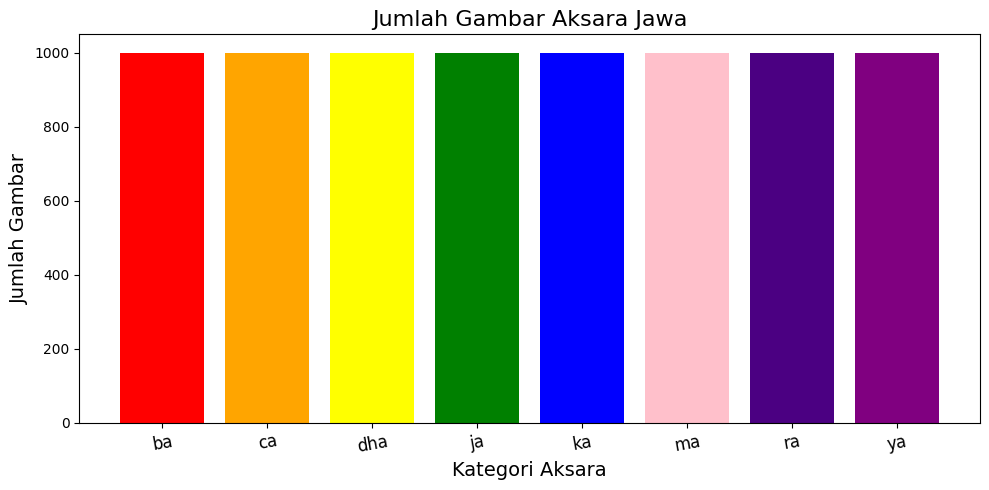

In [4]:
import matplotlib.pyplot as plt
import os
# Define an empty list
file_counts = []
def countFile(link):
    path = link
    num_files = len([f for f in os.listdir(path) if os.path.isfile(os.path.join(path, f))])
    file_counts.append(num_files)
    print(f"Jumlah File {link} is ", num_files)
    
    
countFile("C:\\Users\\wawn1\\projects_skripsi\\data\\data_preprocessing\\v1.0\\ba")
countFile("C:\\Users\\wawn1\\projects_skripsi\\data\\data_preprocessing\\v1.0\\ca")
countFile("C:\\Users\\wawn1\\projects_skripsi\\data\\data_preprocessing\\v1.0\\dha")
countFile("C:\\Users\\wawn1\\projects_skripsi\\data\\data_preprocessing\\v1.0\\ja")
countFile("C:\\Users\\wawn1\\projects_skripsi\\data\\data_preprocessing\\v1.0\\ka")
countFile("C:\\Users\\wawn1\\projects_skripsi\\data\\data_preprocessing\\v1.0\\ma")
countFile("C:\\Users\\wawn1\\projects_skripsi\\data\\data_preprocessing\\v1.0\\ra")
countFile("C:\\Users\\wawn1\\projects_skripsi\\data\\data_preprocessing\\v1.0\\ya")

# Define the input path aksara
aksara_categories = ['ba', 'ca', 'dha', 'ja', 'ka', 'ma', 'ra', 'ya']

colors = ['red', 'orange', 'yellow', 'green', 'blue', 'pink', 'indigo', 'purple']

# Create bar chart
plt.figure(figsize=(10, 5))
plt.bar(aksara_categories, file_counts, color=colors)
plt.xlabel('Kategori Aksara', fontsize=14)
plt.ylabel('Jumlah Gambar', fontsize=14)
plt.title('Jumlah Gambar Aksara Jawa', fontsize=16)
plt.xticks(fontsize=12, rotation=10)
plt.tight_layout()

# Show the plot
plt.show()

In [5]:
AksaraJawa = [f.name for f in os.scandir(main_path) if f.is_dir()]

# Define the target image size
image_size = (64, 64)

batch_size = 64

print("Jumlah Kategori Emosi:", len(AksaraJawa))
print(AksaraJawa)

Jumlah Kategori Emosi: 8
['ba', 'ca', 'dha', 'ja', 'ka', 'ma', 'ra', 'ya']


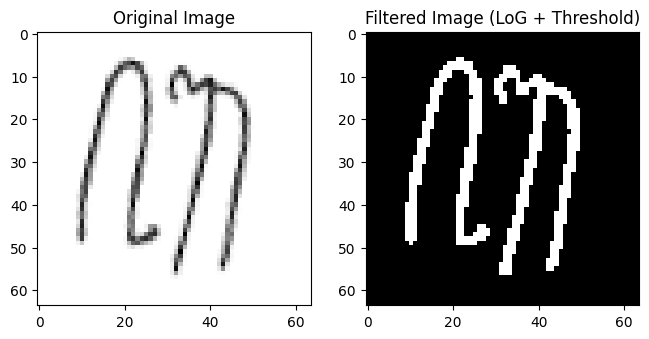

In [6]:
import cv2
from keras.utils import to_categorical

def apply_laplacian_of_gaussian(image, size, sigma):
    # Convert image to uint8
    image_uint8 = (image * 255).astype(np.uint8)
    
    # Apply Gaussian filter
    gaussian_filtered = cv2.GaussianBlur(image_uint8, (size, size), 0)
    
    # Apply Laplacian filter
    laplacian_filtered = cv2.Laplacian(gaussian_filtered, cv2.CV_64F)
    
    return laplacian_filtered

def create_image_generator_with_log(main_path, emotions, image_size):
    for index, emotion in enumerate(emotions):
        emotion_path = os.path.join(main_path, emotion)
        for filename in os.listdir(emotion_path):
            image_path = os.path.join(emotion_path, filename)
            image = cv2.imread(image_path)
            image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)  # Convert to grayscale
            image = cv2.resize(image, image_size)  # Resize image
            
            # Normalization
            image = image.astype('float32') / 255.0
            
            # Apply Laplacian of Gaussian filter
            image_filtered = apply_laplacian_of_gaussian(image, size=3, sigma=1.0)
            
            yield image, image_filtered, index

def load_images(main_path, emotions, image_size):
    X, y = [], []
    
    for image, _, label in create_image_generator_with_log(main_path, emotions, image_size):
        X.append(image)
        y.append(label)
    
    X = np.array(X)
    y = to_categorical(np.array(y))
    
    return X, y

# Load images with Laplacian of Gaussian filter applied
X, y = load_images(main_path, aksara_categories, image_size)

# Define the input shape
input_shape = (64, 64, 1)

# Select one image to display
index_to_display = 0
sample_image_original_log = X[index_to_display]
sample_image_filtered_log = apply_laplacian_of_gaussian(sample_image_original_log, size=3, sigma=1.0)

# Apply thresholding for edge detection results
threshold = 5
sample_image_filtered_log_thresholded = np.zeros_like(sample_image_filtered_log)
sample_image_filtered_log_thresholded[sample_image_filtered_log > threshold] = 255

# Display the original image, filtered image, and their difference
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.imshow(sample_image_original_log, cmap='gray')
plt.title("Original Image")

plt.subplot(1, 3, 2)
plt.imshow(sample_image_filtered_log_thresholded, cmap='gray')  
plt.title("Filtered Image (LoG + Threshold)")

# plt.subplot(1, 3, 3)
# plt.imshow(np.abs(sample_image_original_log - sample_image_filtered_log_thresholded), cmap='gray')
# plt.title("Difference")

plt.show()

In [7]:
print(f"Bentuk input pada gambar: {image_size}")

Bentuk input pada gambar: (64, 64)


In [8]:
from sklearn.model_selection import train_test_split

# Train test split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print("Jumlah data pelatihan (X_train):", X_train.shape[0])
print("Jumlah data pengujian (X_test):", X_test.shape[0])

Jumlah data pelatihan (X_train): 5600
Jumlah data pengujian (X_test): 2400


# Model 1

In [9]:
import tensorflow as tf
from tensorflow.keras.utils import plot_model

from tensorflow.keras.applications import VGG16

vgg16 = tf.keras.applications.VGG16(input_shape=(128, 128, 3),
                                    pooling=max,
                                    include_top=False,
                                    weights="imagenet")
vgg16.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 128, 128, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 128, 128, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 128, 128, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 64, 64, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 64, 64, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 64, 64, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 32, 32, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 32, 32, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 32, 32, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 16, 16, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 16, 16, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 16, 16, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 16, 16, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 8, 8, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 8, 8, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 8, 8, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 8, 8, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 4, 4, 512)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

In [10]:
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.constraints import max_norm
from tensorflow.keras import layers, initializers, models
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization

model = Sequential()
model.add(vgg16)
model = models.Sequential()

# Block 1
model.add(Conv2D(32, (3, 3), padding='same', activation='relu', kernel_regularizer=l2(0.001), input_shape=input_shape))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3), padding='same', activation='relu', kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Dropout(0.75))

# Block 2
model.add(Conv2D(64, (3, 3), padding='same', activation='relu', kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), padding='same', activation='relu', kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.75))

# Block 3
model.add(Conv2D(128, (3, 3), padding='same', activation='relu', kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3), padding='same', activation='relu', kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3), padding='same', activation='relu', kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.75))

# Block 4
model.add(Conv2D(256, (3, 3), padding='same', activation='relu', kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(Conv2D(256, (3, 3), padding='same', activation='relu', kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(Conv2D(256, (3, 3), padding='same', activation='relu', kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.75))

# Block 5
model.add(Conv2D(512, (3, 3), padding='same', activation='relu', kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(Conv2D(512, (3, 3), padding='same', activation='relu', kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(Conv2D(512, (3, 3), padding='same', activation='relu', kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.75))

# Flatten
model.add(Flatten())

# Dense layers
model.add(Dense(256, activation='relu', kernel_initializer=initializers.RandomNormal(mean=0.0, stddev=0.005, seed=None)))
model.add(BatchNormalization())
model.add(Dropout(0.75))

model.add(Dense(128, activation='relu', kernel_initializer=initializers.RandomNormal(mean=0.0, stddev=0.005, seed=None)))
model.add(BatchNormalization())
model.add(Dropout(0.75))

# Output layer
model.add(Dense(8, activation='softmax'))

# Adam optimizer with learning rate scheduling, Weight Decay, and Gradient Clipping
opt = Adam(learning_rate=0.001, weight_decay=1e-4, clipvalue=0.5)
    
# Compile the model
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# Model summary
model.summary()

c:\Users\wawn1\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 64, 64, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 64, 64, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 64, 64, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 64, 64, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 21, 21, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 21, 21, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 21, 21, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 21, 21, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 21, 21, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 21, 21, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 10, 10, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 10, 10, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 10, 10, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 10, 10, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 10, 10, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 10, 10, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 10, 10, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 10, 10, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 5, 5, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 5, 5, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 5, 5, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 7,987,432 (30.47 MB)

 Trainable params: 7,980,904 (30.44 MB)

 Non-trainable params: 6,528 (25.50 KB)

In [11]:
history_v1 = model.fit(X_train, y_train, batch_size=batch_size, epochs=30, #validation_data=(X_test, y_test)) => follow up

Epoch 1/30
88/88 ━━━━━━━━━━━━━━━━━━━━ 303s 3s/step - accuracy: 0.1534 - loss: 6.3989 - val_accuracy: 0.1283 - val_loss: 5.1322
Epoch 2/30
88/88 ━━━━━━━━━━━━━━━━━━━━ 268s 3s/step - accuracy: 0.3057 - loss: 4.9941 - val_accuracy: 0.1283 - val_loss: 12.6233
Epoch 3/30
88/88 ━━━━━━━━━━━━━━━━━━━━ 238s 3s/step - accuracy: 0.3818 - loss: 4.3557 - val_accuracy: 0.1283 - val_loss: 19.2760
Epoch 4/30
88/88 ━━━━━━━━━━━━━━━━━━━━ 292s 3s/step - accuracy: 0.4099 - loss: 4.0769 - val_accuracy: 0.1283 - val_loss: 25.5987
Epoch 5/30
88/88 ━━━━━━━━━━━━━━━━━━━━ 289s 3s/step - accuracy: 0.5106 - loss: 3.7592 - val_accuracy: 0.1283 - val_loss: 17.9312
Epoch 6/30
88/88 ━━━━━━━━━━━━━━━━━━━━ 320s 4s/step - accuracy: 0.6473 - loss: 3.3020 - val_accuracy: 0.1283 - val_loss: 16.6991
Epoch 7/30
88/88 ━━━━━━━━━━━━━━━━━━━━ 271s 3s/step - accuracy: 0.7413 - loss: 2.9994 - val_accuracy: 0.1283 - val_loss: 10.9142
Epoch 8/30
88/88 ━━━━━━━━━━━━━━━━━━━━ 301s 3s/step - accuracy: 0.8389 - loss: 2.6713 - val_accuracy: 0.12

<Axes: >

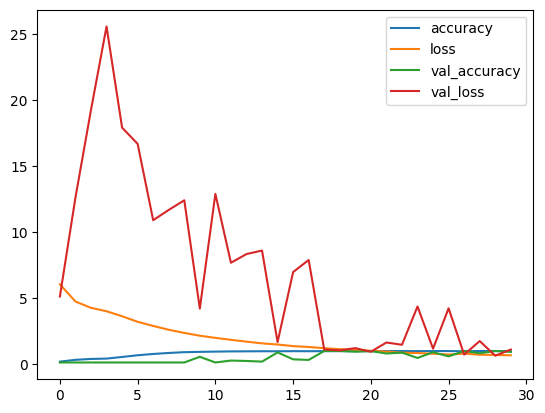

In [12]:
pd.DataFrame(history_v1.history).plot()

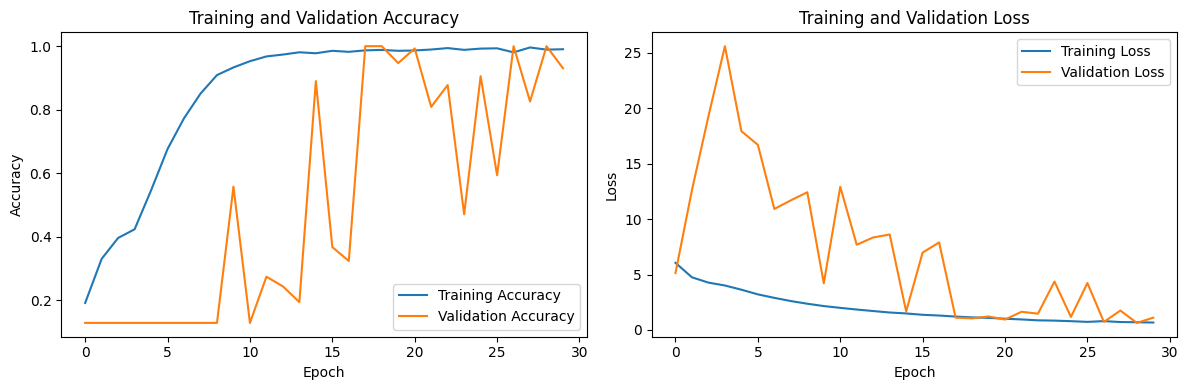

In [13]:
# Menampilkan grafik training dan validation accuracy
import matplotlib.pyplot as plt

acc_v1 = history_v1.history['accuracy']
val_acc = history_v1.history['val_accuracy']

loss_v1 = history_v1.history['loss']

val_loss = history_v1.history['val_loss']

epochs_range = range(len(acc_v1))

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc_v1, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss_v1, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()

In [14]:
# Evaluasi model menggunakan data uji
loss_v1, acc_v1 = model.evaluate(X_test, y_test)

# Print hasil evaluasi
print("Loss:", loss_v1)
print("Accuracy:", acc_v1)

75/75 ━━━━━━━━━━━━━━━━━━━━ 23s 306ms/step - accuracy: 0.9371 - loss: 1.0337
Loss: 1.1107981204986572
Accuracy: 0.9304166436195374


## Calculates the false positive rate, true positive rate, and AUC score

75/75 ━━━━━━━━━━━━━━━━━━━━ 35s 459ms/step


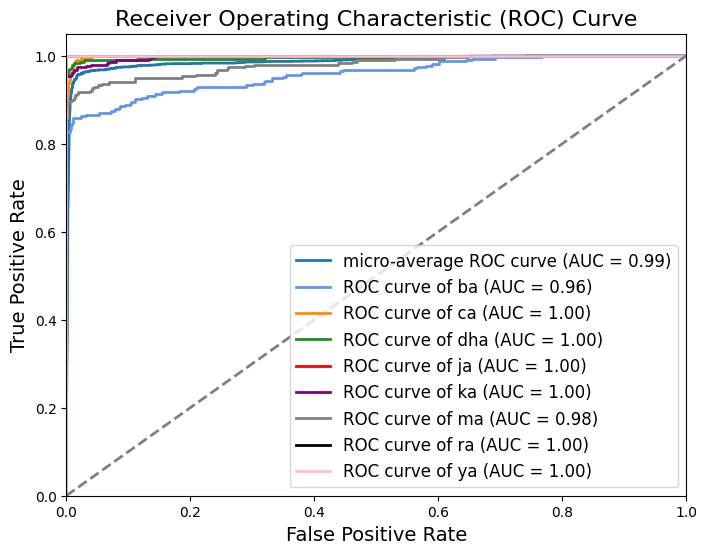

In [15]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
import matplotlib.pyplot as plt

# Make predictions
y_pred = model.predict(X_test)

# Compute ROC curve and ROC AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(8):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC AUC score
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_pred.ravel())
roc_auc["micro"] = roc_auc_score(y_test, y_pred, multi_class='ovr')

# Plot the ROC curves for each class and the micro-average ROC curve
plt.figure(figsize=(8, 6))
lw = 2
plt.plot(fpr["micro"], tpr["micro"], lw=lw, label='micro-average ROC curve (AUC = {0:0.2f})'
                                                   ''.format(roc_auc["micro"]))
colors = ['cornflowerblue', 'darkorange', 'forestgreen', 'red', 'purple', 'gray', 'black', 'pink']
for i, color in zip(range(8), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of {0} (AUC = {1:0.2f})'.format(aksara_categories[i], roc_auc[i]))
    
plt.plot([0, 1], [0, 1], color='gray', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('Receiver Operating Characteristic (ROC) Curve', fontsize=16)
plt.legend(loc="lower right", fontsize=12)
plt.show()

In [16]:
from sklearn.metrics import classification_report, accuracy_score,roc_curve,confusion_matrix

y_test_int = np.argmax(y_test, axis=1)
y_pred = model.predict(X_test)
y_pred_int = np.argmax(y_pred, axis=1)

print(classification_report(y_test_int, y_pred_int))

75/75 ━━━━━━━━━━━━━━━━━━━━ 24s 314ms/step
              precision    recall  f1-score   support

           0       1.00      0.81      0.90       313
           1       0.88      0.99      0.93       333
           2       0.99      0.95      0.97       291
           3       0.99      1.00      1.00       269
           4       1.00      0.84      0.91       300
           5       1.00      0.86      0.92       300
           6       0.72      1.00      0.84       308
           7       1.00      1.00      1.00       286

    accuracy                           0.93      2400
   macro avg       0.95      0.93      0.93      2400
weighted avg       0.95      0.93      0.93      2400



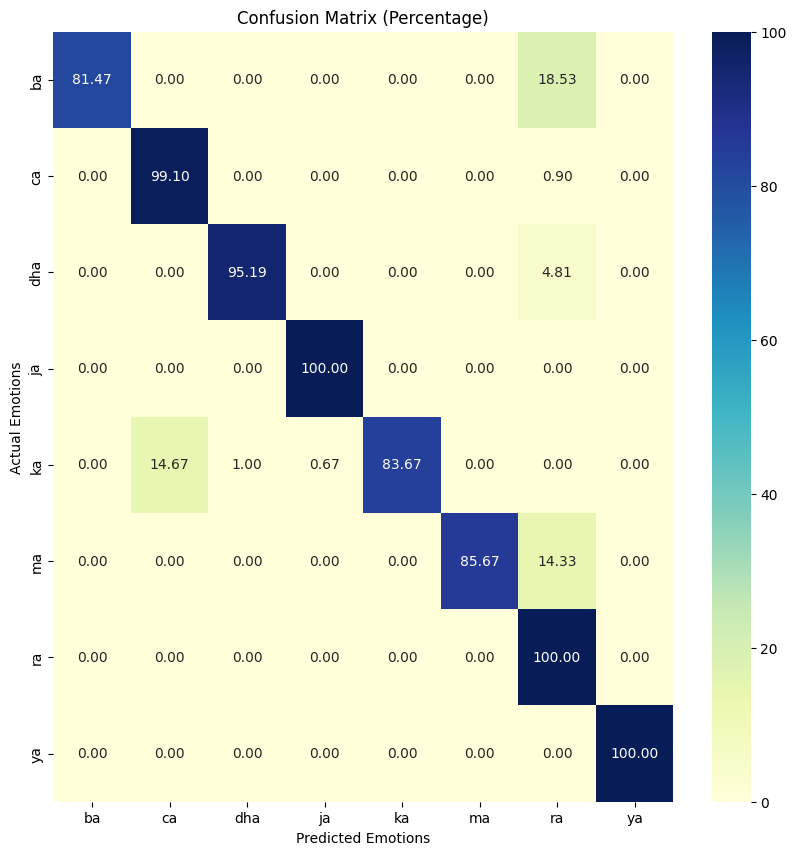

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

plt.figure(figsize=(10, 10))
cm = confusion_matrix(y_test_int, y_pred_int)

# Hitung total sampel untuk setiap kelas aktual
total_per_class = np.sum(cm, axis=1)

# Konversi setiap elemen dalam confusion matrix menjadi persentase
cm_percent = (cm.astype('float') / total_per_class[:, np.newaxis]) * 100

# Gunakan label langsung dari variabel Aksara
emotions_labels = aksara_categories

sns.heatmap(cm_percent, annot=True, fmt=".2f", cmap="YlGnBu", xticklabels=emotions_labels, yticklabels=emotions_labels)
plt.xlabel("Predicted Emotions")
plt.ylabel("Actual Emotions")
plt.title("Confusion Matrix (Percentage)")
plt.show()

# Model 2

In [25]:
import tensorflow as tf
from tensorflow.keras.utils import plot_model

from tensorflow.keras.applications import VGG16

vgg16 = tf.keras.applications.VGG16(input_shape=(128, 128, 3),
                                    pooling=max,
                                    include_top=False,
                                    weights="imagenet")
vgg16.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_6 (InputLayer)      │ (None, 128, 128, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 128, 128, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 128, 128, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 64, 64, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 64, 64, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 64, 64, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 32, 32, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 32, 32, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 32, 32, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 16, 16, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 16, 16, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 16, 16, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 16, 16, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 8, 8, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 8, 8, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 8, 8, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 8, 8, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 4, 4, 512)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

In [27]:
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.constraints import max_norm
from tensorflow.keras import layers, initializers, models
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization

model = Sequential()
model.add(vgg16)
model = models.Sequential()

# Block 1
model.add(Conv2D(32, (3, 3), padding='same', activation='relu', kernel_regularizer=l2(0.0001), input_shape=input_shape))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3), padding='same', activation='relu', kernel_regularizer=l2(0.0001))) # Regularization
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Dropout(0.75))

# Block 2
model.add(Conv2D(64, (3, 3), padding='same', activation='relu', kernel_regularizer=l2(0.0001)))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), padding='same', activation='relu', kernel_regularizer=l2(0.0001)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.75))

# Block 3
model.add(Conv2D(128, (3, 3), padding='same', activation='relu', kernel_regularizer=l2(0.0001)))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3), padding='same', activation='relu', kernel_regularizer=l2(0.0001)))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3), padding='same', activation='relu', kernel_regularizer=l2(0.0001)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.75))

# Block 4
# model.add(Conv2D(256, (3, 3), padding='same', activation='relu', kernel_regularizer=l2(0.0001)))
# model.add(BatchNormalization())
# model.add(Conv2D(256, (3, 3), padding='same', activation='relu', kernel_regularizer=l2(0.0001)))
# model.add(BatchNormalization())
# model.add(Conv2D(256, (3, 3), padding='same', activation='relu', kernel_regularizer=l2(0.0001)))
# model.add(BatchNormalization())
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.75))

# Block 5
# model.add(Conv2D(512, (3, 3), padding='same', activation='relu', kernel_regularizer=l2(0.0001)))
# model.add(BatchNormalization())
# model.add(Conv2D(512, (3, 3), padding='same', activation='relu', kernel_regularizer=l2(0.0001)))
# model.add(BatchNormalization())
# model.add(Conv2D(512, (3, 3), padding='same', activation='relu', kernel_regularizer=l2(0.0001)))
# model.add(BatchNormalization())
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.75))

# Flatten
model.add(Flatten())

# Dense layers
model.add(Dense(256, activation='relu', kernel_initializer=initializers.RandomNormal(mean=0.0, stddev=0.0001, seed=None))) # Weight Initialization
model.add(BatchNormalization())
model.add(Dropout(0.75))

# model.add(Dense(128, activation='relu', kernel_initializer=initializers.RandomNormal(mean=0.0, stddev=0.005, seed=None)))
# model.add(BatchNormalization())
# model.add(Dropout(0.75))

# Output layer
model.add(Dense(8, activation='softmax'))

# Adam optimizer with learning rate scheduling, Weight Decay, and Gradient Clipping
opt = Adam(learning_rate=0.0001, weight_decay=1e-4, clipvalue=0.0001)
    
# Compile the model
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# Model summary
model.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_34 (Conv2D)              │ (None, 64, 64, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_39          │ (None, 64, 64, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_35 (Conv2D)              │ (None, 64, 64, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_40          │ (None, 64, 64, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 21, 21, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_19 (Dropout)            │ (None, 21, 21, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_36 (Conv2D)              │ (None, 21, 21, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_41          │ (None, 21, 21, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_37 (Conv2D)              │ (None, 21, 21, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_42          │ (None, 21, 21, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (None, 10, 10, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_20 (Dropout)            │ (None, 10, 10, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_38 (Conv2D)              │ (None, 10, 10, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_43          │ (None, 10, 10, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_39 (Conv2D)              │ (None, 10, 10, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_44          │ (None, 10, 10, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_40 (Conv2D)              │ (None, 10, 10, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_45          │ (None, 10, 10, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_16 (MaxPooling2D) │ (None, 5, 5, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_21 (Dropout)            │ (None, 5, 5, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 3200)           │             0 │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 1,258,856 (4.80 MB)

 Trainable params: 1,257,192 (4.80 MB)

 Non-trainable params: 1,664 (6.50 KB)

In [28]:
history_v2 = model.fit(X_train, y_train, batch_size=batch_size, epochs=30, validation_data=(X_test, y_test))

Epoch 1/30
88/88 ━━━━━━━━━━━━━━━━━━━━ 231s 2s/step - accuracy: 0.4038 - loss: 1.9495 - val_accuracy: 0.1283 - val_loss: 2.3922
Epoch 2/30
88/88 ━━━━━━━━━━━━━━━━━━━━ 283s 3s/step - accuracy: 0.7526 - loss: 0.7758 - val_accuracy: 0.1283 - val_loss: 4.9909
Epoch 3/30
88/88 ━━━━━━━━━━━━━━━━━━━━ 239s 3s/step - accuracy: 0.8865 - loss: 0.4226 - val_accuracy: 0.1283 - val_loss: 6.8528
Epoch 4/30
88/88 ━━━━━━━━━━━━━━━━━━━━ 191s 2s/step - accuracy: 0.9278 - loss: 0.3314 - val_accuracy: 0.1283 - val_loss: 6.1994
Epoch 5/30
88/88 ━━━━━━━━━━━━━━━━━━━━ 156s 2s/step - accuracy: 0.9554 - loss: 0.2655 - val_accuracy: 0.1283 - val_loss: 6.4977
Epoch 6/30
88/88 ━━━━━━━━━━━━━━━━━━━━ 194s 2s/step - accuracy: 0.9631 - loss: 0.2505 - val_accuracy: 0.1283 - val_loss: 4.1312
Epoch 7/30
88/88 ━━━━━━━━━━━━━━━━━━━━ 135s 2s/step - accuracy: 0.9800 - loss: 0.2094 - val_accuracy: 0.1283 - val_loss: 4.1279
Epoch 8/30
88/88 ━━━━━━━━━━━━━━━━━━━━ 140s 2s/step - accuracy: 0.9778 - loss: 0.1940 - val_accuracy: 0.2575 - v

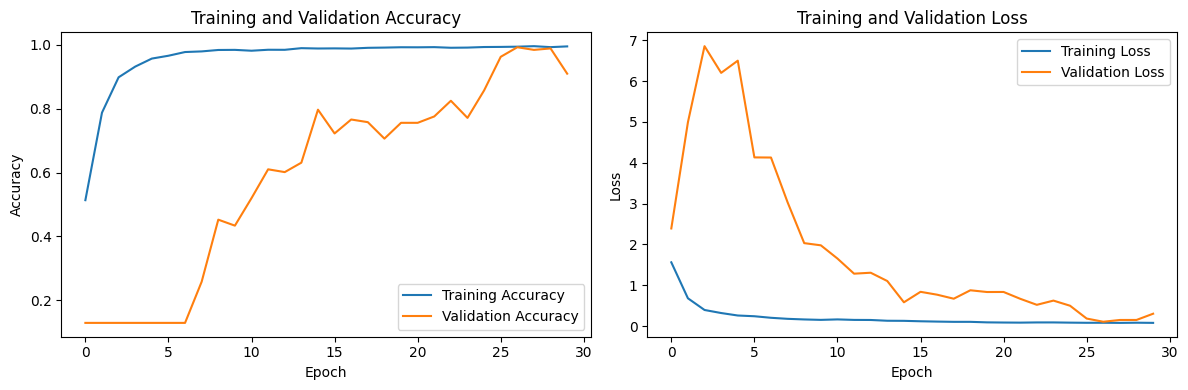

In [29]:
# Menampilkan grafik training dan validation accuracy
import matplotlib.pyplot as plt

acc_v2 = history_v2.history['accuracy']
val_acc = history_v2.history['val_accuracy']

loss_v2 = history_v2.history['loss']

val_loss = history_v2.history['val_loss']

epochs_range = range(len(acc_v2))

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc_v2, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss_v2, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()

In [30]:
# Evaluasi model menggunakan data uji
loss_v2, acc_v2 = model.evaluate(X_test, y_test)

# Print hasil evaluasi
print("Loss:", loss_v2)
print("Accuracy:", acc_v2)

75/75 ━━━━━━━━━━━━━━━━━━━━ 13s 176ms/step - accuracy: 0.9095 - loss: 0.3068
Loss: 0.3063127100467682
Accuracy: 0.9100000262260437


75/75 ━━━━━━━━━━━━━━━━━━━━ 14s 170ms/step


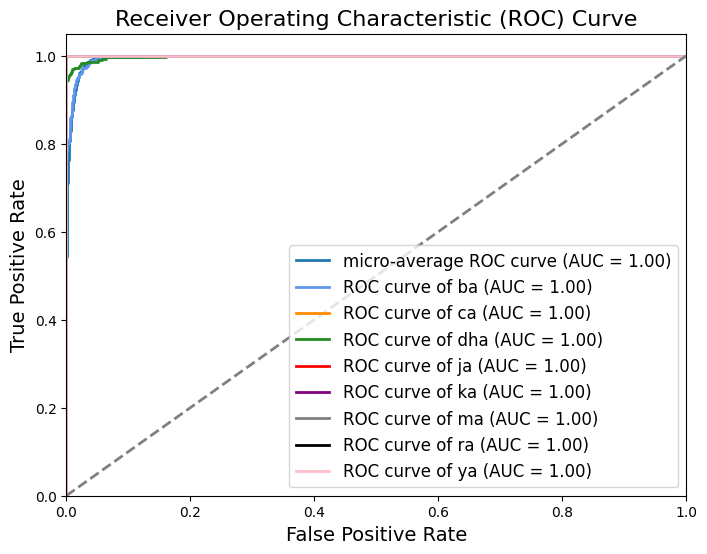

In [31]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
import matplotlib.pyplot as plt

# Make predictions
y_pred = model.predict(X_test)

# Compute ROC curve and ROC AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(8):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC AUC score
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_pred.ravel())
roc_auc["micro"] = roc_auc_score(y_test, y_pred, multi_class='ovr')

# Plot the ROC curves for each class and the micro-average ROC curve
plt.figure(figsize=(8, 6))
lw = 2
plt.plot(fpr["micro"], tpr["micro"], lw=lw, label='micro-average ROC curve (AUC = {0:0.2f})'
                                                   ''.format(roc_auc["micro"]))
colors = ['cornflowerblue', 'darkorange', 'forestgreen', 'red', 'purple', 'gray', 'black', 'pink']
for i, color in zip(range(8), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of {0} (AUC = {1:0.2f})'.format(aksara_categories[i], roc_auc[i]))
    
plt.plot([0, 1], [0, 1], color='gray', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('Receiver Operating Characteristic (ROC) Curve', fontsize=16)
plt.legend(loc="lower right", fontsize=12)
plt.show()

In [32]:
from sklearn.metrics import classification_report, accuracy_score,roc_curve,confusion_matrix

y_test_int = np.argmax(y_test, axis=1)
y_pred = model.predict(X_test)
y_pred_int = np.argmax(y_pred, axis=1)

print(classification_report(y_test_int, y_pred_int))

75/75 ━━━━━━━━━━━━━━━━━━━━ 15s 203ms/step
              precision    recall  f1-score   support

           0       1.00      0.58      0.73       313
           1       1.00      1.00      1.00       333
           2       1.00      0.88      0.94       291
           3       1.00      0.88      0.93       269
           4       1.00      1.00      1.00       300
           5       1.00      0.95      0.97       300
           6       0.59      1.00      0.74       308
           7       1.00      1.00      1.00       286

    accuracy                           0.91      2400
   macro avg       0.95      0.91      0.91      2400
weighted avg       0.95      0.91      0.91      2400



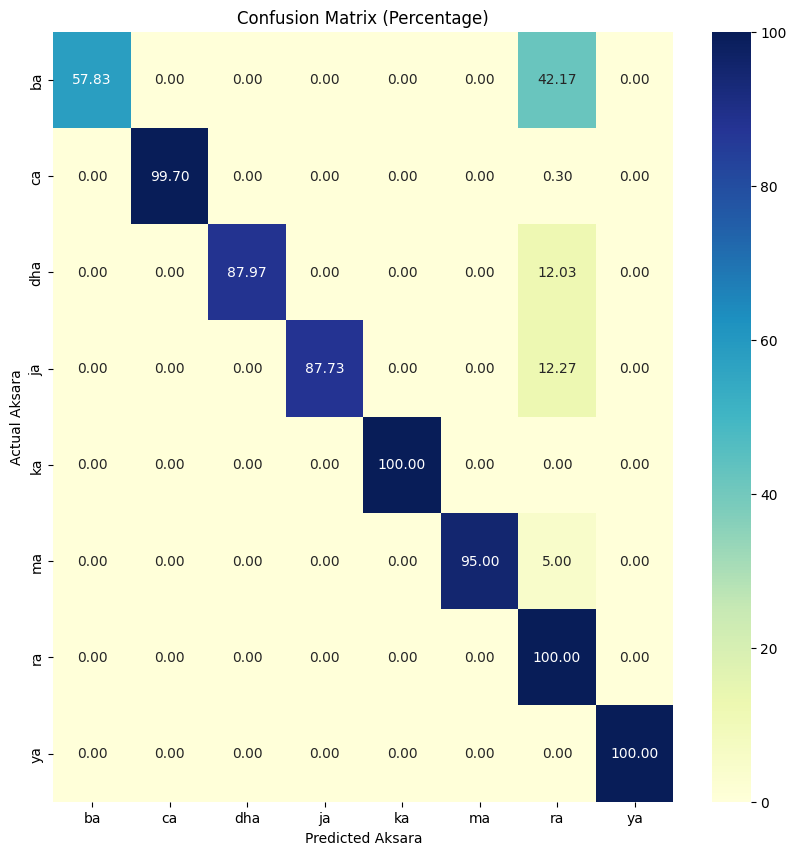

In [33]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

plt.figure(figsize=(10, 10))
cm = confusion_matrix(y_test_int, y_pred_int)

# Hitung total sampel untuk setiap kelas aktual
total_per_class = np.sum(cm, axis=1)

# Konversi setiap elemen dalam confusion matrix menjadi persentase
cm_percent = (cm.astype('float') / total_per_class[:, np.newaxis]) * 100

# Gunakan label langsung dari variabel Aksara
emotions_labels = aksara_categories

sns.heatmap(cm_percent, annot=True, fmt=".2f", cmap="YlGnBu", xticklabels=emotions_labels, yticklabels=emotions_labels)
plt.xlabel("Predicted Aksara")
plt.ylabel("Actual Aksara")
plt.title("Confusion Matrix (Percentage)")
plt.show()

# Model 3

In [34]:
import tensorflow as tf
from tensorflow.keras.utils import plot_model

from tensorflow.keras.applications import VGG16

vgg16 = tf.keras.applications.VGG16(input_shape=(128, 128, 3),
                                    pooling=max,
                                    include_top=False,
                                    weights="imagenet")
vgg16.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_9 (InputLayer)      │ (None, 128, 128, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 128, 128, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 128, 128, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 64, 64, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 64, 64, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 64, 64, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 32, 32, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 32, 32, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 32, 32, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 16, 16, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 16, 16, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 16, 16, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 16, 16, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 8, 8, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 8, 8, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 8, 8, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 8, 8, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 4, 4, 512)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

In [37]:
from keras.constraints import max_norm
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.constraints import max_norm
from tensorflow.keras import layers, initializers, models
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization

model = Sequential()
model.add(vgg16)
model = models.Sequential()

# Block 1
model.add(Conv2D(32, (3, 3), padding='same', activation='relu', kernel_regularizer=l2(0.0001), input_shape=input_shape))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3), padding='same', activation='relu', kernel_regularizer=l2(0.0001)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Dropout(0.75))

# Block 2
model.add(Conv2D(64, (3, 3), padding='same', activation='relu', kernel_regularizer=l2(0.0001)))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), padding='same', activation='relu', kernel_regularizer=l2(0.0001)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.75))

# Block 3
model.add(Conv2D(128, (3, 3), padding='same', activation='relu', kernel_regularizer=l2(0.0001)))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3), padding='same', activation='relu', kernel_regularizer=l2(0.0001)))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3), padding='same', activation='relu', kernel_regularizer=l2(0.0001)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.75))

# Block 4
# model.add(Conv2D(256, (3, 3), padding='same', activation='relu', kernel_regularizer=l2(0.0001)))
# model.add(BatchNormalization())
# model.add(Conv2D(256, (3, 3), padding='same', activation='relu', kernel_regularizer=l2(0.0001)))
# model.add(BatchNormalization())
# model.add(Conv2D(256, (3, 3), padding='same', activation='relu', kernel_regularizer=l2(0.0001)))
# model.add(BatchNormalization())
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.75))

# Block 5
# model.add(Conv2D(512, (3, 3), padding='same', activation='relu', kernel_regularizer=l2(0.0001)))
# model.add(BatchNormalization())
# model.add(Conv2D(512, (3, 3), padding='same', activation='relu', kernel_regularizer=l2(0.0001)))
# model.add(BatchNormalization())
# model.add(Conv2D(512, (3, 3), padding='same', activation='relu', kernel_regularizer=l2(0.0001)))
# model.add(BatchNormalization())
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.75))

# Flatten
model.add(Flatten())

# Dense layers
model.add(Dense(256, activation='relu', kernel_constraint=max_norm(max_value=2, axis=0))) #Weight Constraints)) #Weight Constraints
model.add(BatchNormalization())
model.add(Dropout(0.75))

# model.add(Dense(128, activation='relu', kernel_initializer=initializers.RandomNormal(mean=0.0, stddev=0.005, seed=None)))
# model.add(BatchNormalization())
# model.add(Dropout(0.75))

# Output layer
model.add(Dense(8, activation='softmax'))

# Adam optimizer with learning rate scheduling, Weight Decay, and Gradient Clipping
opt = Adam(learning_rate=0.0001, weight_decay=1e-4, clipvalue=0.0001)
    
# Compile the model
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# Model summary
model.summary()

Model: "sequential_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_55 (Conv2D)              │ (None, 64, 64, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_61          │ (None, 64, 64, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_56 (Conv2D)              │ (None, 64, 64, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_62          │ (None, 64, 64, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_23 (MaxPooling2D) │ (None, 21, 21, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_29 (Dropout)            │ (None, 21, 21, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_57 (Conv2D)              │ (None, 21, 21, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_63          │ (None, 21, 21, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_58 (Conv2D)              │ (None, 21, 21, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_64          │ (None, 21, 21, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_24 (MaxPooling2D) │ (None, 10, 10, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_30 (Dropout)            │ (None, 10, 10, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_59 (Conv2D)              │ (None, 10, 10, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_65          │ (None, 10, 10, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_60 (Conv2D)              │ (None, 10, 10, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_66          │ (None, 10, 10, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_61 (Conv2D)              │ (None, 10, 10, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_67          │ (None, 10, 10, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_25 (MaxPooling2D) │ (None, 5, 5, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_31 (Dropout)            │ (None, 5, 5, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_7 (Flatten)             │ (None, 3200)           │             0 │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 1,258,856 (4.80 MB)

 Trainable params: 1,257,192 (4.80 MB)

 Non-trainable params: 1,664 (6.50 KB)

In [38]:
history_v3 = model.fit(X_train, y_train, batch_size=batch_size, epochs=30, validation_data=(X_test, y_test))

Epoch 1/30
88/88 ━━━━━━━━━━━━━━━━━━━━ 179s 2s/step - accuracy: 0.1313 - loss: 4.2012 - val_accuracy: 0.1283 - val_loss: 2.2905
Epoch 2/30
88/88 ━━━━━━━━━━━━━━━━━━━━ 199s 2s/step - accuracy: 0.2174 - loss: 3.5336 - val_accuracy: 0.1283 - val_loss: 3.7813
Epoch 3/30
88/88 ━━━━━━━━━━━━━━━━━━━━ 146s 2s/step - accuracy: 0.3401 - loss: 2.6679 - val_accuracy: 0.1283 - val_loss: 7.7915
Epoch 4/30
88/88 ━━━━━━━━━━━━━━━━━━━━ 147s 2s/step - accuracy: 0.4708 - loss: 1.8581 - val_accuracy: 0.1283 - val_loss: 11.7352
Epoch 5/30
88/88 ━━━━━━━━━━━━━━━━━━━━ 148s 2s/step - accuracy: 0.6325 - loss: 1.2251 - val_accuracy: 0.1283 - val_loss: 17.0354
Epoch 6/30
88/88 ━━━━━━━━━━━━━━━━━━━━ 146s 2s/step - accuracy: 0.7679 - loss: 0.7329 - val_accuracy: 0.1283 - val_loss: 18.2726
Epoch 7/30
88/88 ━━━━━━━━━━━━━━━━━━━━ 200s 2s/step - accuracy: 0.8456 - loss: 0.4892 - val_accuracy: 0.1283 - val_loss: 17.5096
Epoch 8/30
88/88 ━━━━━━━━━━━━━━━━━━━━ 206s 2s/step - accuracy: 0.9089 - loss: 0.3135 - val_accuracy: 0.1283

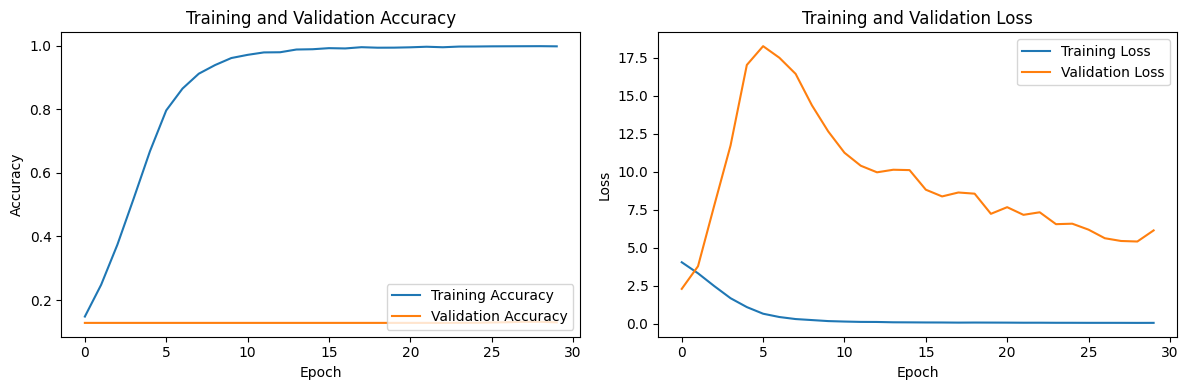

In [39]:
# Menampilkan grafik training dan validation accuracy
import matplotlib.pyplot as plt

acc_v3 = history_v3.history['accuracy']
val_acc = history_v3.history['val_accuracy']

loss_v3 = history_v3.history['loss']

val_loss = history_v3.history['val_loss']

epochs_range = range(len(acc_v3))

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc_v3, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss_v3, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()

In [40]:
# Evaluasi model menggunakan data uji
loss_v3, acc_v3 = model.evaluate(X_test, y_test)

# Print hasil evaluasi
print("Loss:", loss_v3)
print("Accuracy:", acc_v3)

75/75 ━━━━━━━━━━━━━━━━━━━━ 11s 146ms/step - accuracy: 0.1278 - loss: 6.1270
Loss: 6.141453742980957
Accuracy: 0.12999999523162842


75/75 ━━━━━━━━━━━━━━━━━━━━ 11s 137ms/step


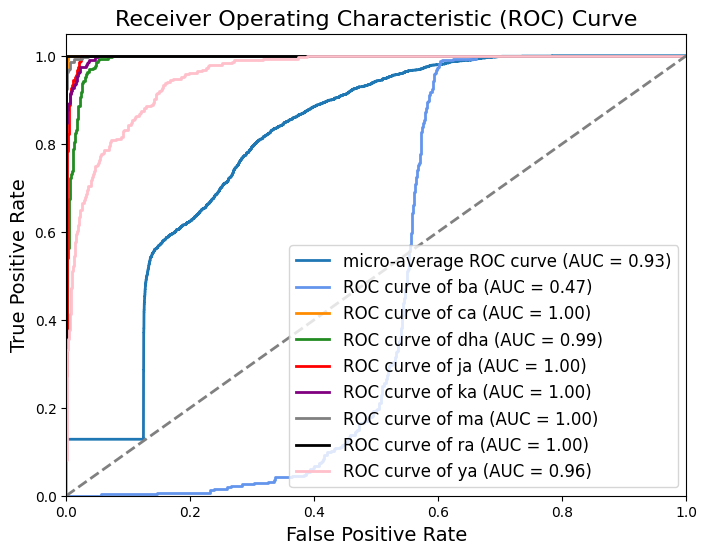

In [41]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
import matplotlib.pyplot as plt

# Make predictions
y_pred = model.predict(X_test)

# Compute ROC curve and ROC AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(8):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC AUC score
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_pred.ravel())
roc_auc["micro"] = roc_auc_score(y_test, y_pred, multi_class='ovr')

# Plot the ROC curves for each class and the micro-average ROC curve
plt.figure(figsize=(8, 6))
lw = 2
plt.plot(fpr["micro"], tpr["micro"], lw=lw, label='micro-average ROC curve (AUC = {0:0.2f})'
                                                   ''.format(roc_auc["micro"]))
colors = ['cornflowerblue', 'darkorange', 'forestgreen', 'red', 'purple', 'gray', 'black', 'pink']
for i, color in zip(range(8), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of {0} (AUC = {1:0.2f})'.format(aksara_categories[i], roc_auc[i]))
    
plt.plot([0, 1], [0, 1], color='gray', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('Receiver Operating Characteristic (ROC) Curve', fontsize=16)
plt.legend(loc="lower right", fontsize=12)
plt.show()

In [42]:
from sklearn.metrics import classification_report, accuracy_score,roc_curve,confusion_matrix

y_test_int = np.argmax(y_test, axis=1)
y_pred = model.predict(X_test)
y_pred_int = np.argmax(y_pred, axis=1)

print(classification_report(y_test_int, y_pred_int))

75/75 ━━━━━━━━━━━━━━━━━━━━ 11s 139ms/step
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       313
           1       1.00      0.01      0.02       333
           2       0.00      0.00      0.00       291
           3       0.00      0.00      0.00       269
           4       1.00      0.00      0.01       300
           5       0.00      0.00      0.00       300
           6       0.13      1.00      0.23       308
           7       0.00      0.00      0.00       286

    accuracy                           0.13      2400
   macro avg       0.27      0.13      0.03      2400
weighted avg       0.28      0.13      0.03      2400



c:\Users\wawn1\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\wawn1\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\wawn1\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

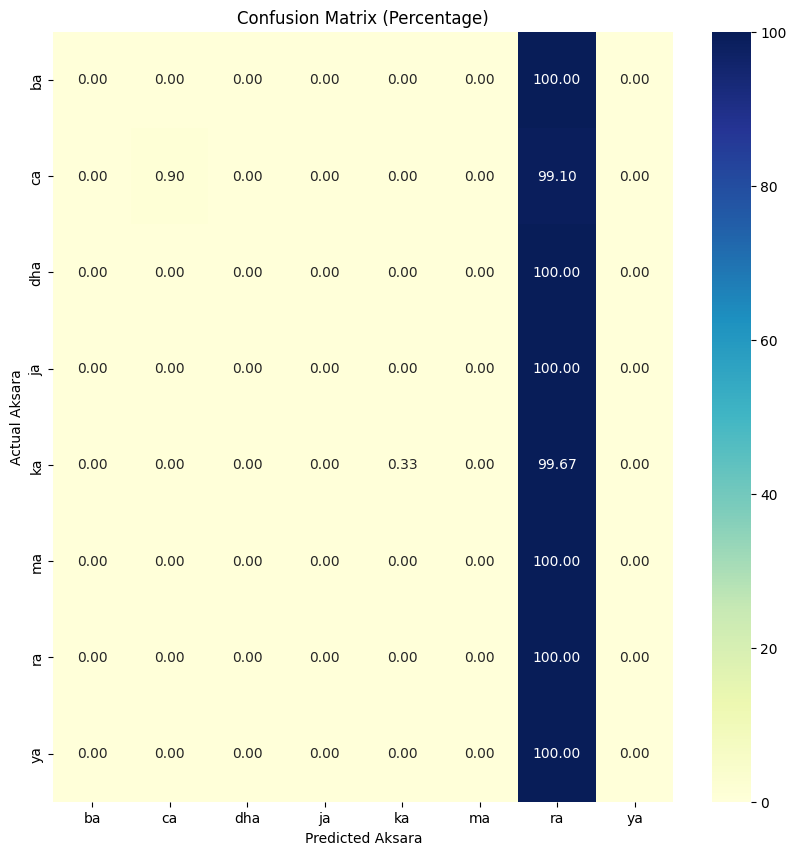

In [43]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

plt.figure(figsize=(10, 10))
cm = confusion_matrix(y_test_int, y_pred_int)

# Hitung total sampel untuk setiap kelas aktual
total_per_class = np.sum(cm, axis=1)

# Konversi setiap elemen dalam confusion matrix menjadi persentase
cm_percent = (cm.astype('float') / total_per_class[:, np.newaxis]) * 100

# Gunakan label langsung dari variabel Aksara
emotions_labels = aksara_categories

sns.heatmap(cm_percent, annot=True, fmt=".2f", cmap="YlGnBu", xticklabels=emotions_labels, yticklabels=emotions_labels)
plt.xlabel("Predicted Aksara")
plt.ylabel("Actual Aksara")
plt.title("Confusion Matrix (Percentage)")
plt.show()